#Kode Program Pendeteksi Jatuh


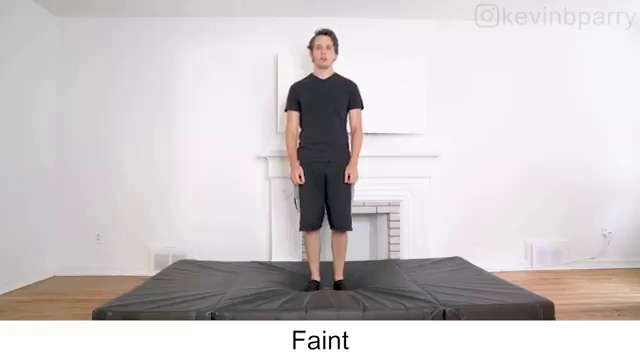

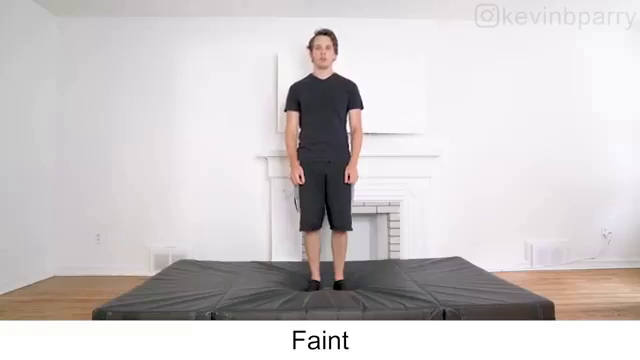

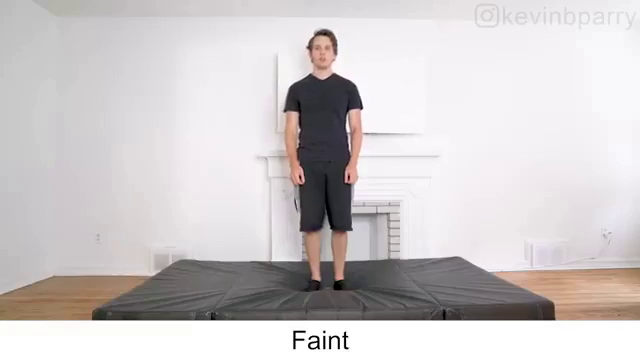

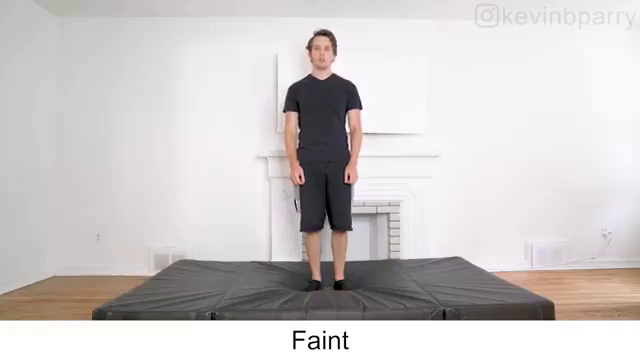

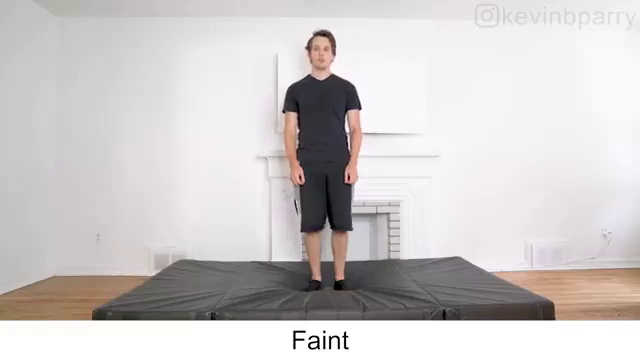

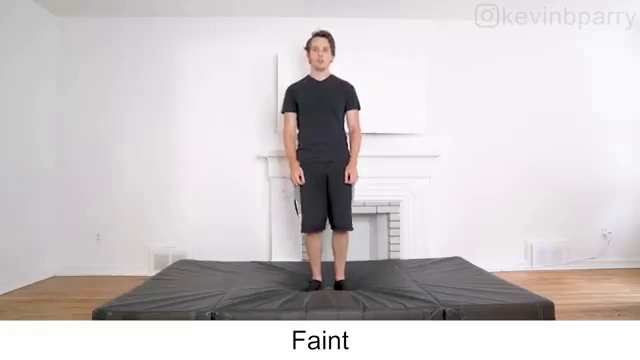

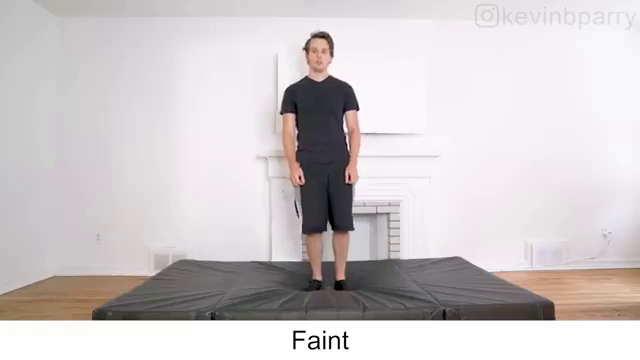

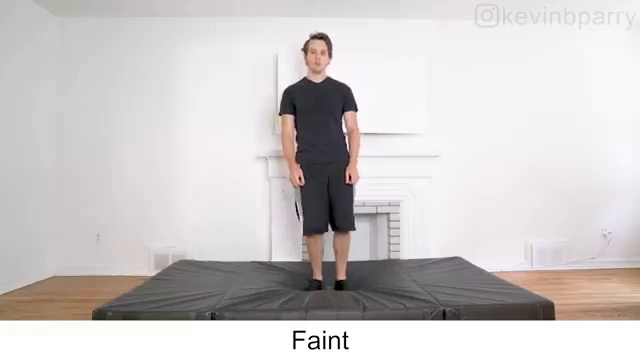

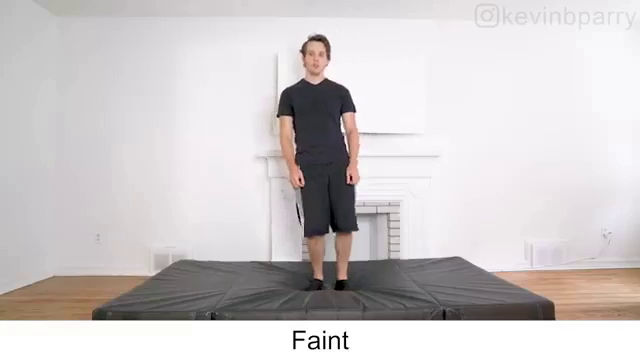

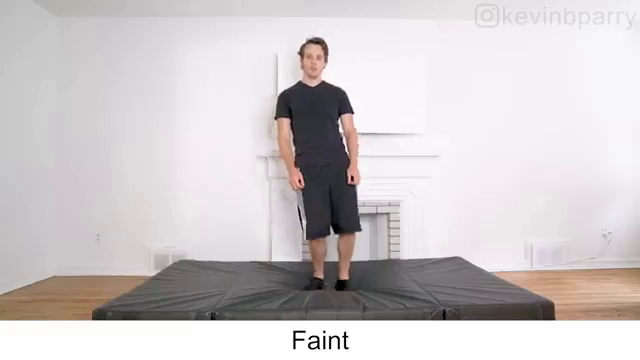

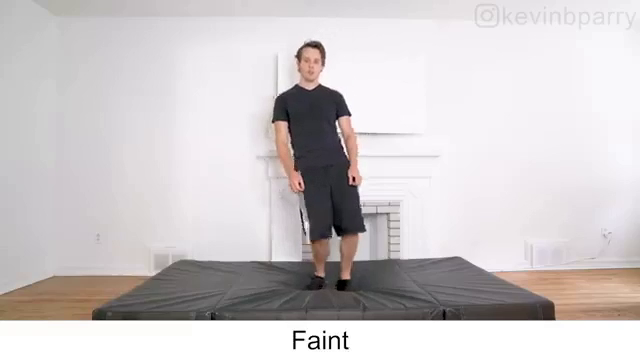

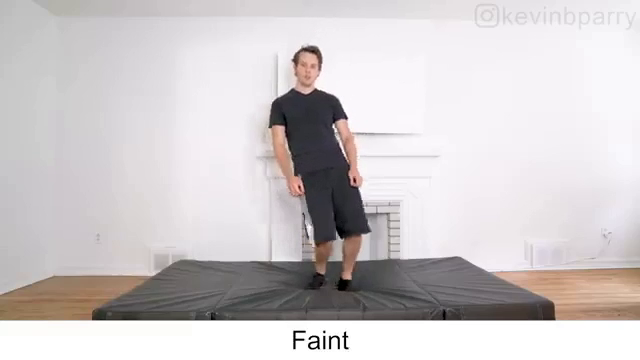

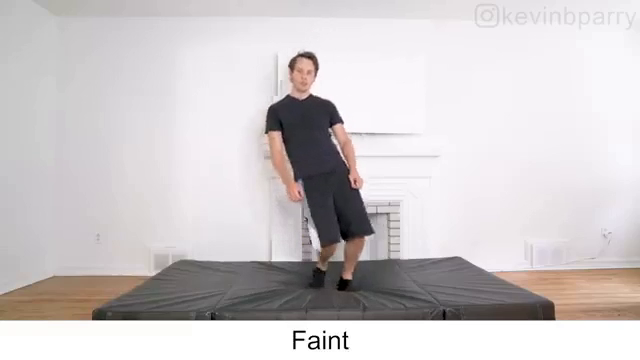

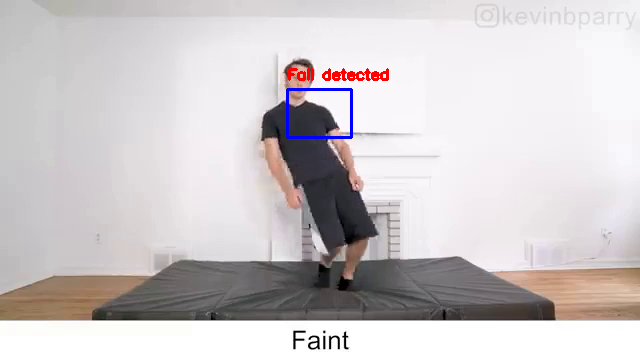

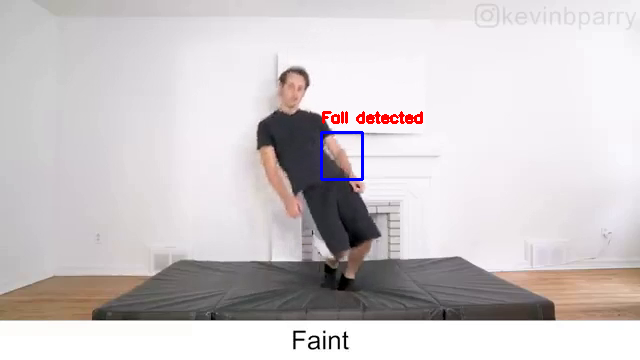

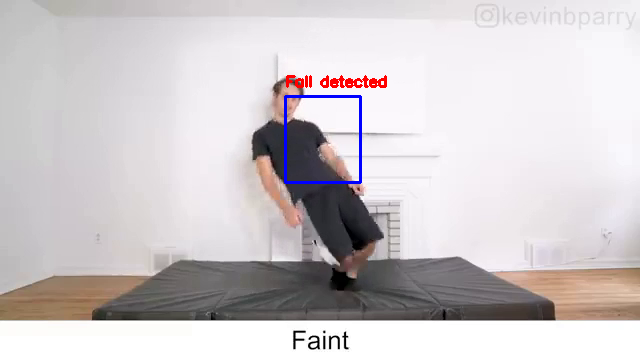

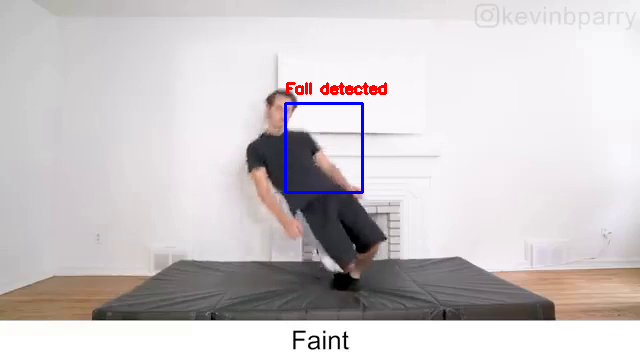

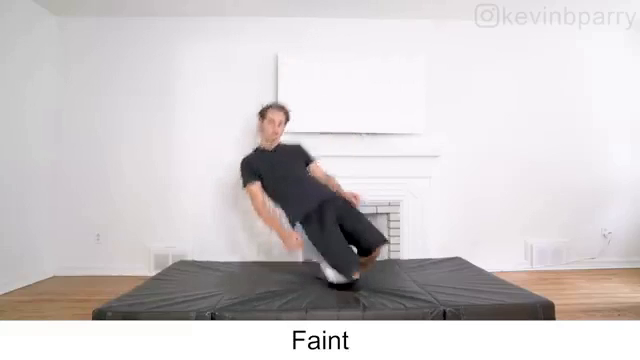

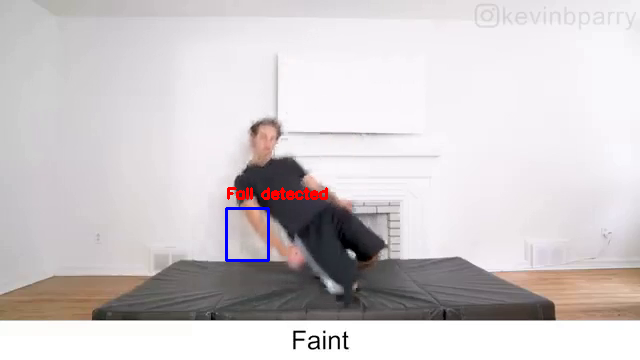

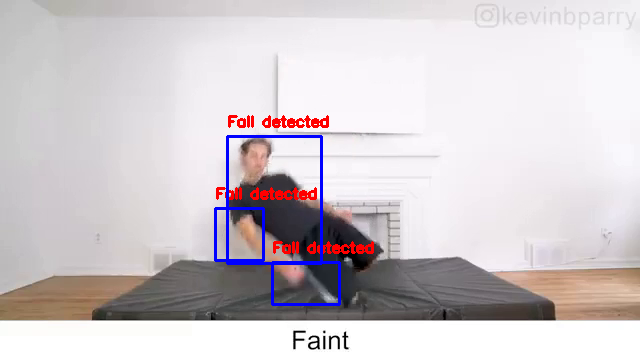

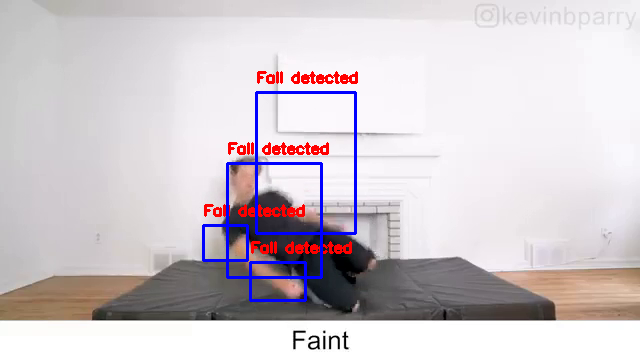

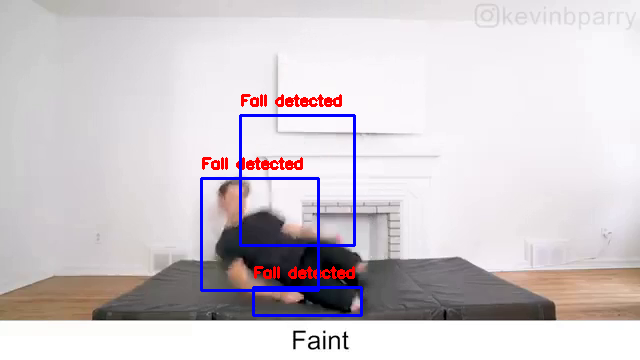

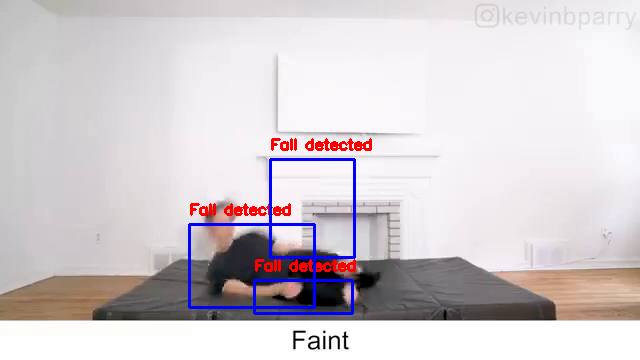

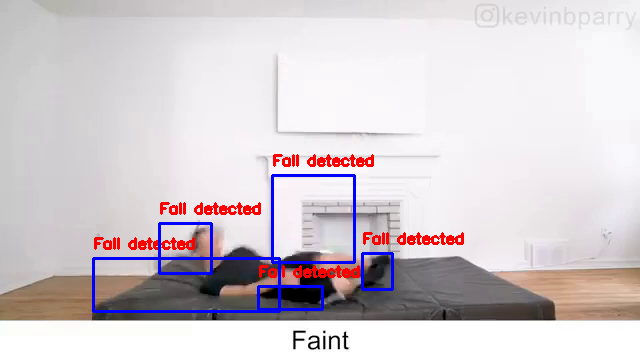

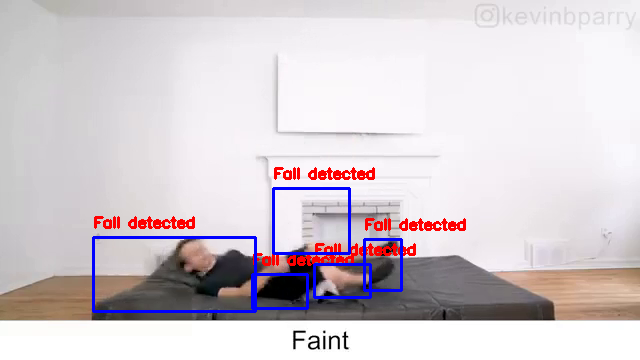

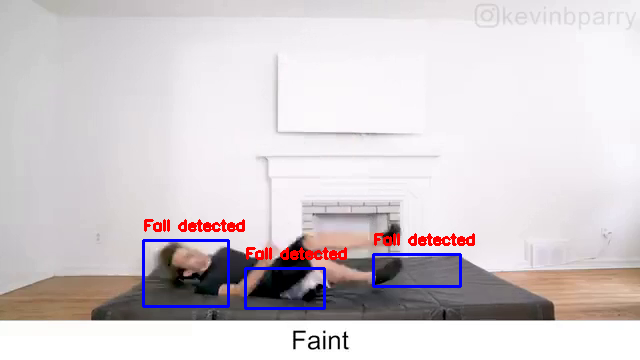

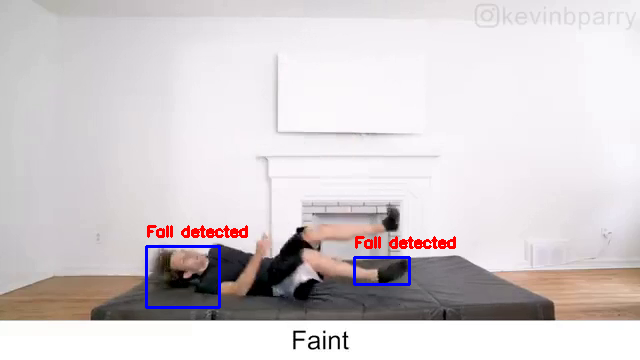

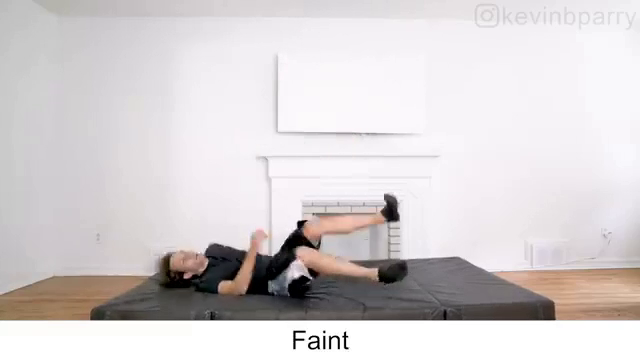

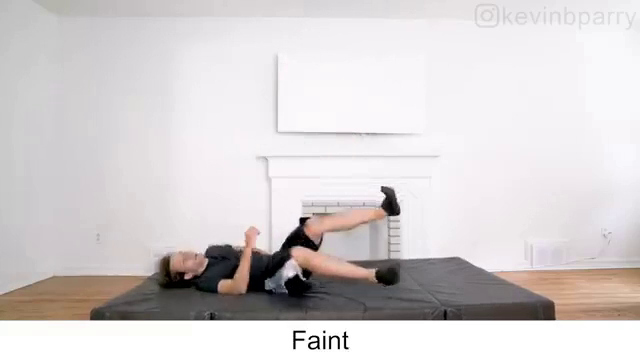

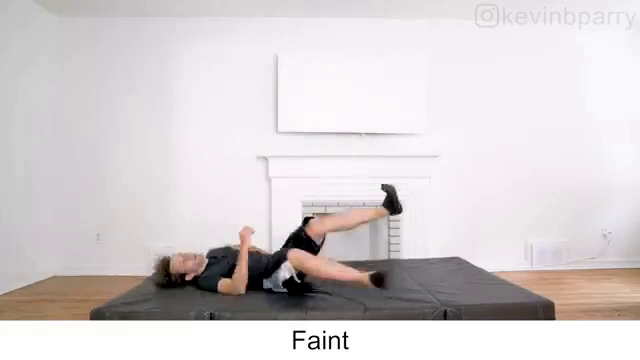

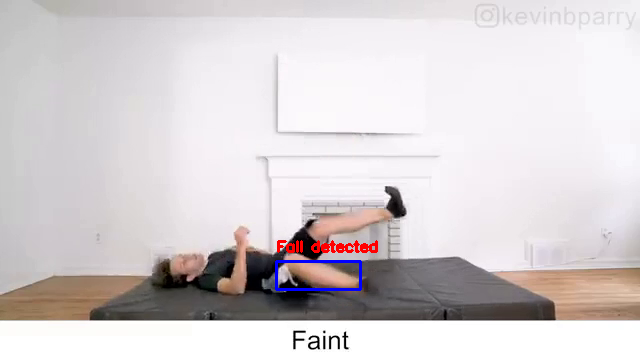

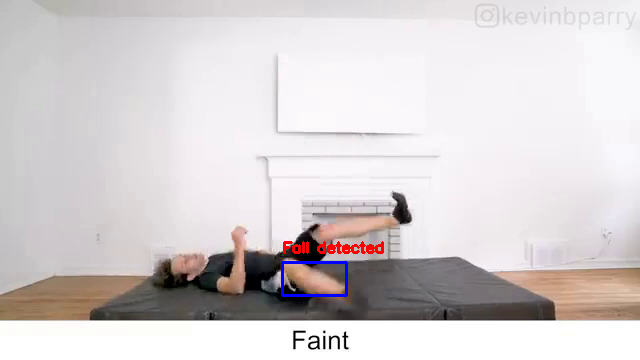

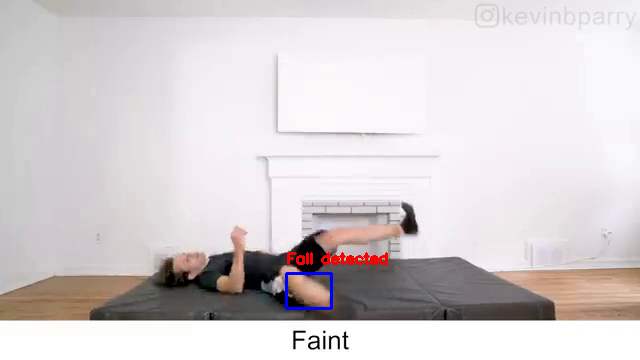

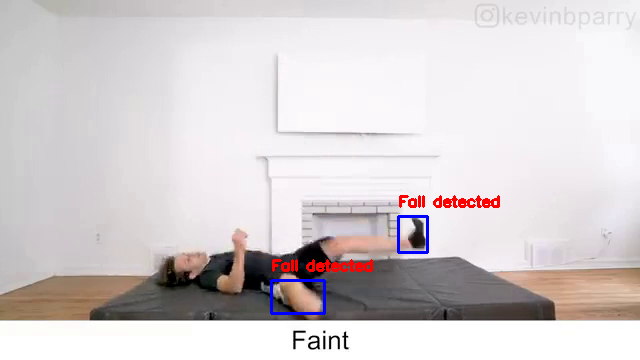

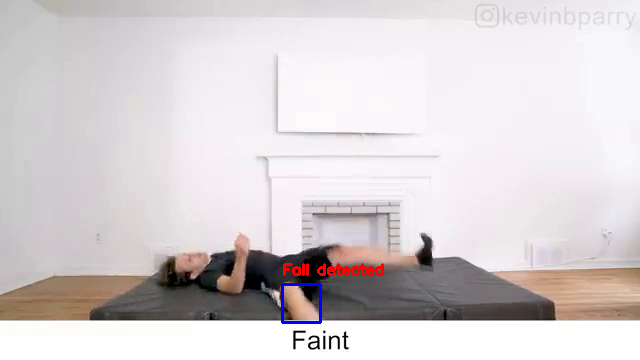

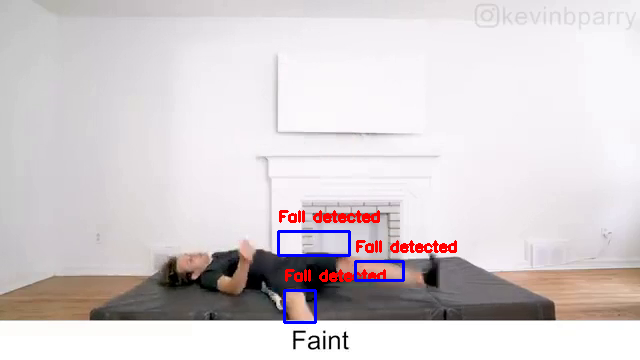

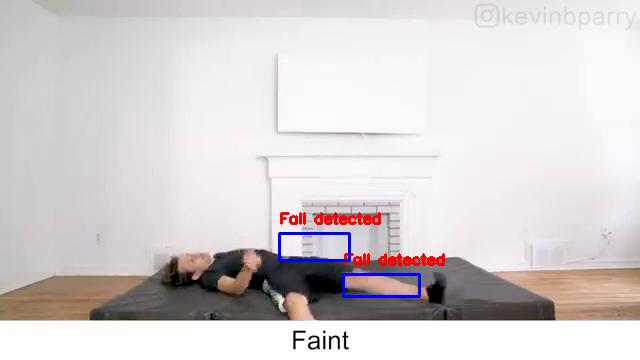

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('/content/drive/MyDrive/TUGAS 4 PCD-MUHAMMAD MAHDI-21 473808 PA 20431/people_fall.mp4')
font = cv2.FONT_HERSHEY_SIMPLEX
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    if ret and frame is not None:

        # pre-processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        equ = cv2.equalizeHist(blur)

        # apply background subtraction
        fgmask = fgbg.apply(equ)

        # Apply threshold
        th = np.zeros(fgmask.shape, dtype=np.uint8)
        th[fgmask > 240] = 255

        # Apply erosion and dilation to remove noise and fill gaps and small holes
        kernel = np.ones((1, 1), dtype=np.uint8)
        opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

        # find contours in the thresholded image
        contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for c in contours:

            # compute the bounding box for the contour
            (x, y, w, h) = cv2.boundingRect(c)

            if w / h < 0.7:
              continue

            # if the area of the bounding box is less than 500 or greater than 10000, ignore it
            area = cv2.contourArea(c)
            if area < 500 or area > 10000:
                continue

            # compute the solidity of the contour
            def compute_solidity(contour):
              hull = cv2.convexHull(contour, returnPoints=False)
              if hull.size == 0:
                  return 0
              area = cv2.contourArea(contour)
              hull_area = cv2.contourArea(cv2.convexHull(contour))
              solidity = float(area) / hull_area
              return solidity

            solidity = compute_solidity(c)

            if solidity < 0.3:
                continue

            # draw bounding box and label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, 'Fall detected', (x, y - 10), font, 0.5, (0, 0, 255), 2)

        # resize the output frame to a smaller size before displaying it
        frame = cv2.resize(frame, (640, 360))

        # display the resulting frame
        cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q') or not ret:
        break

cap.release()
cv2.destroyAllWindows()


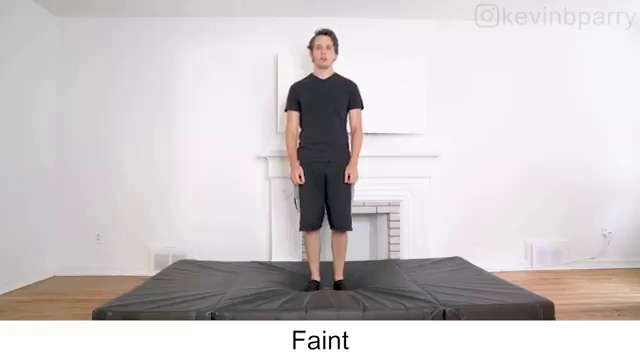

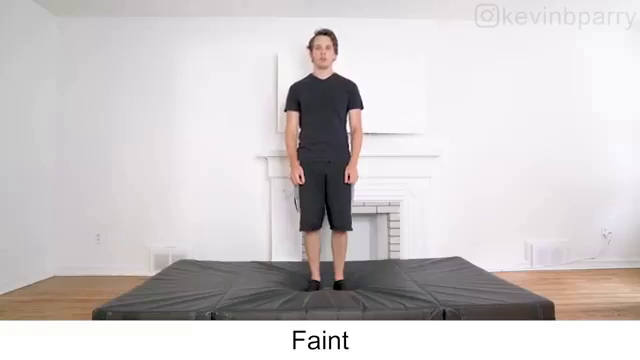

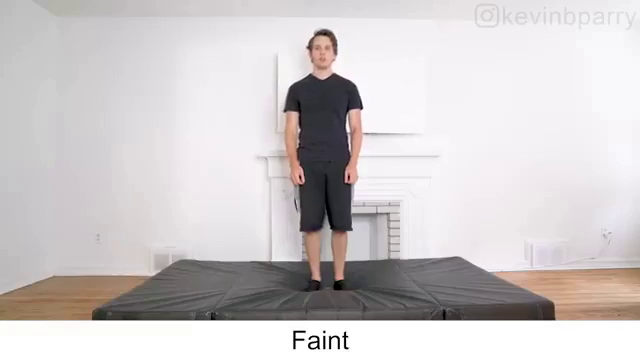

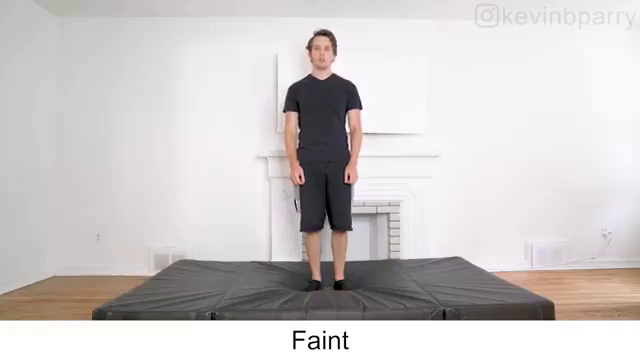

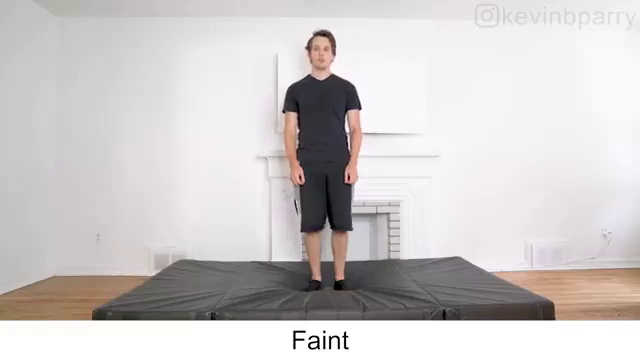

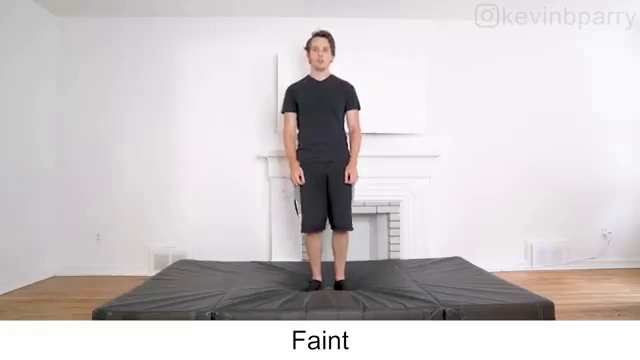

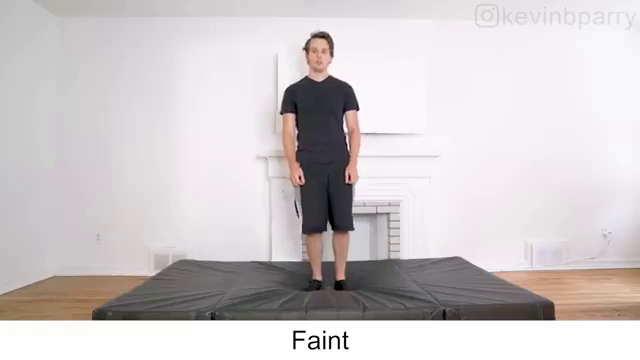

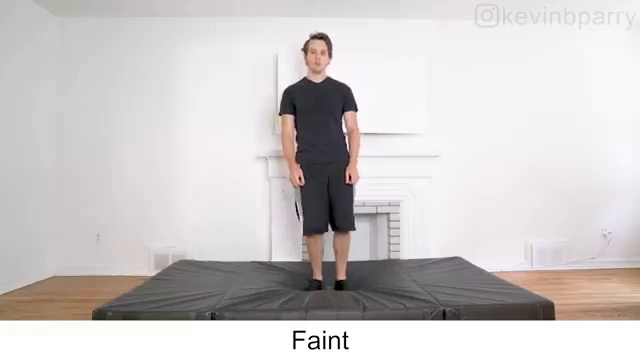

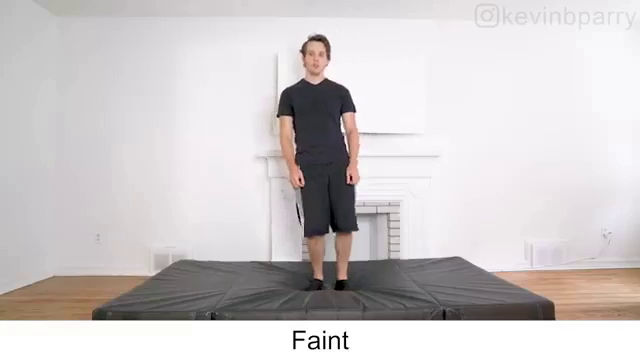

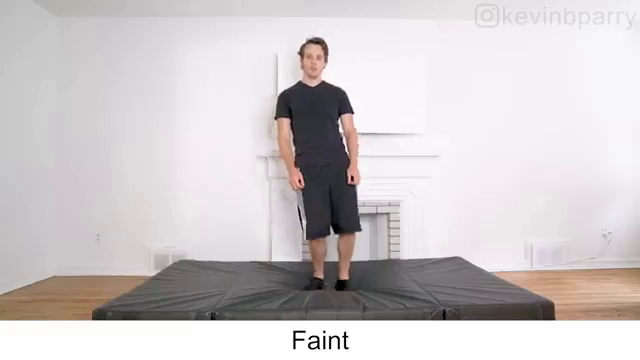

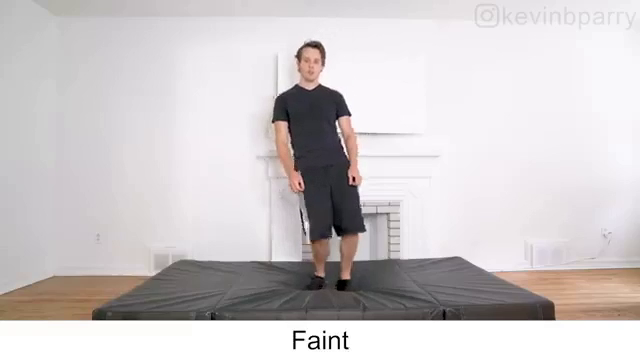

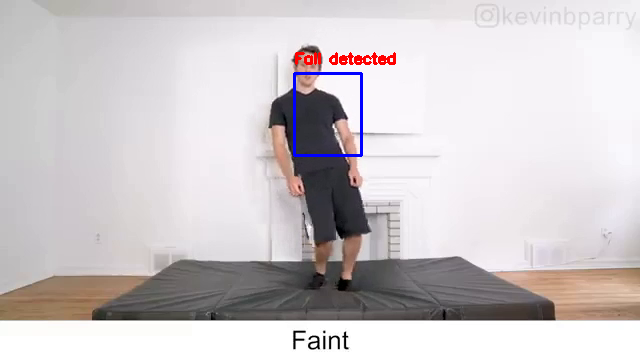

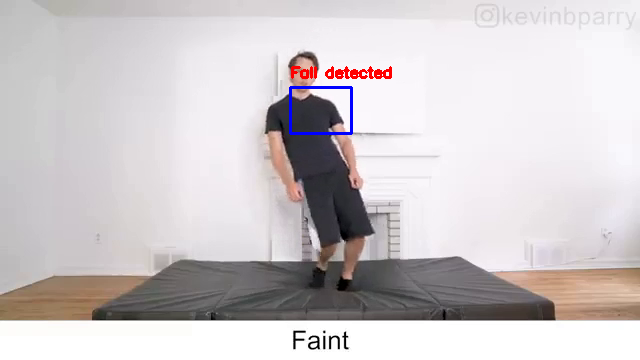

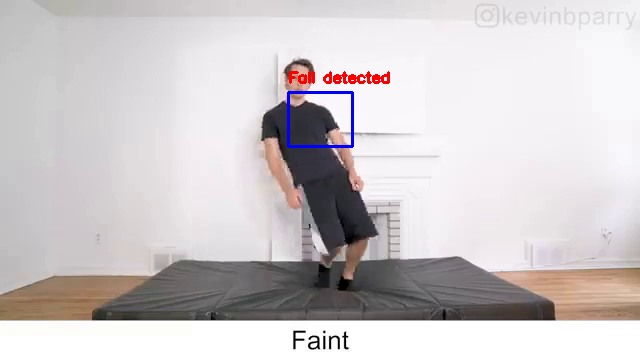

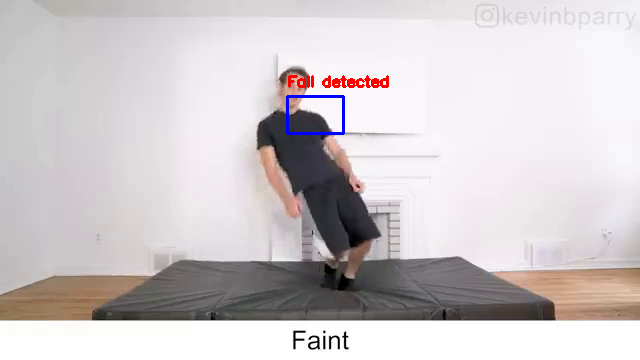

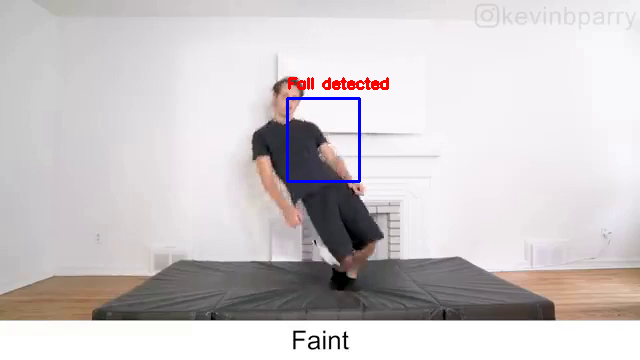

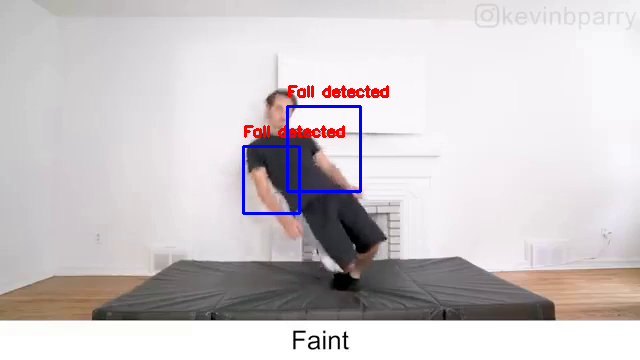

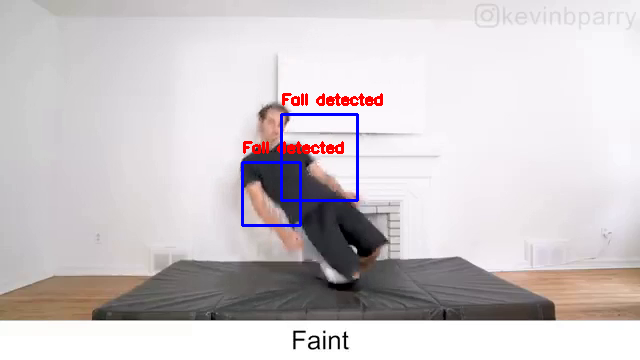

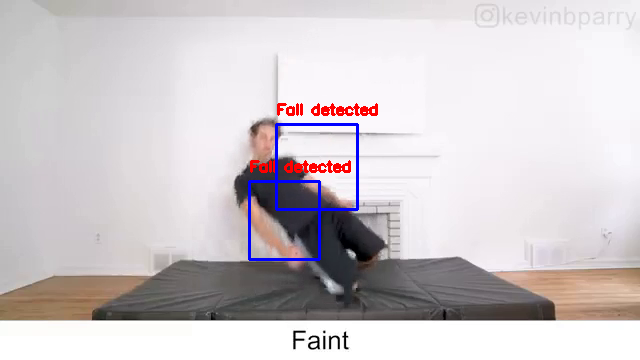

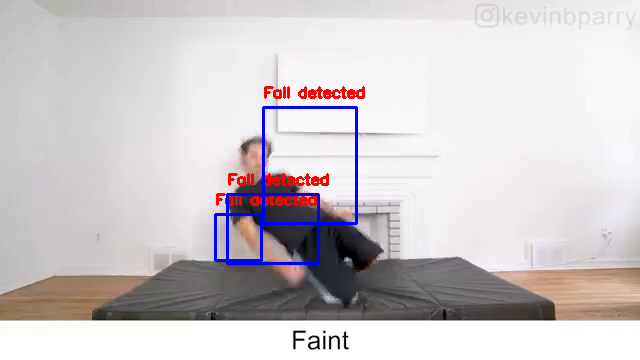

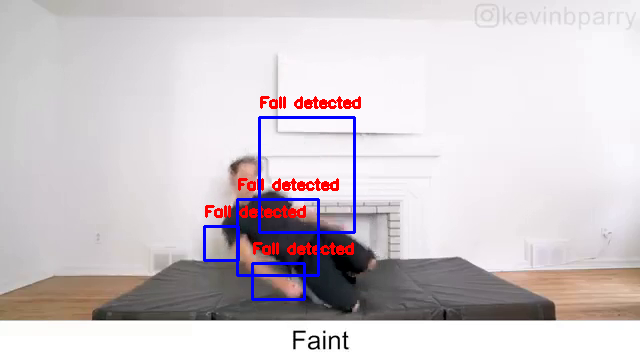

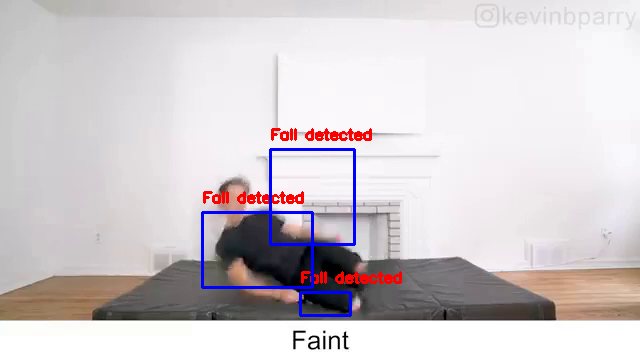

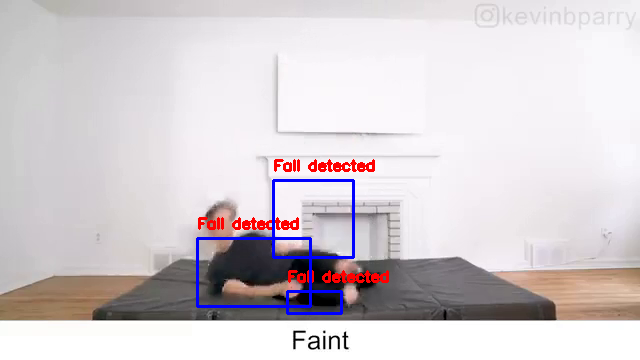

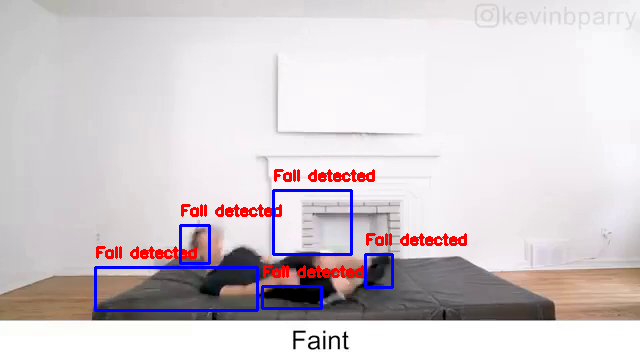

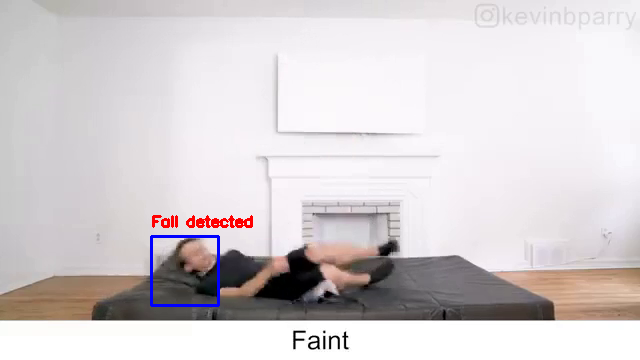

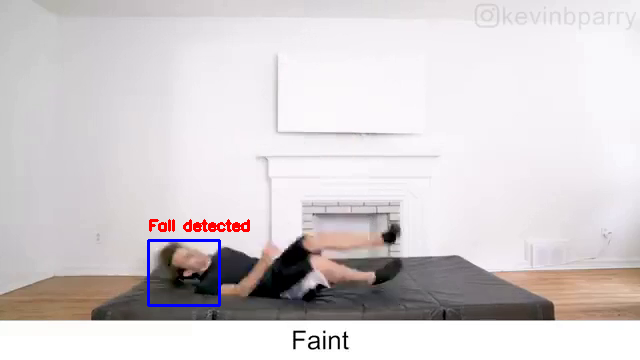

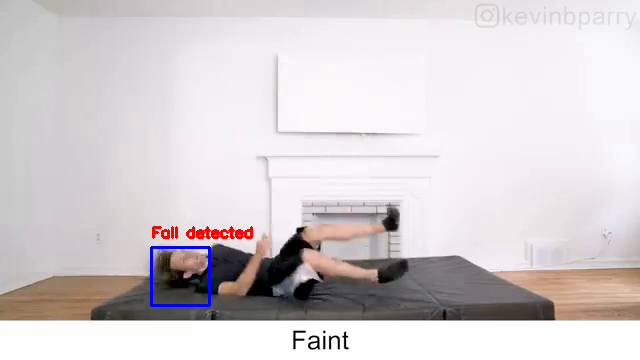

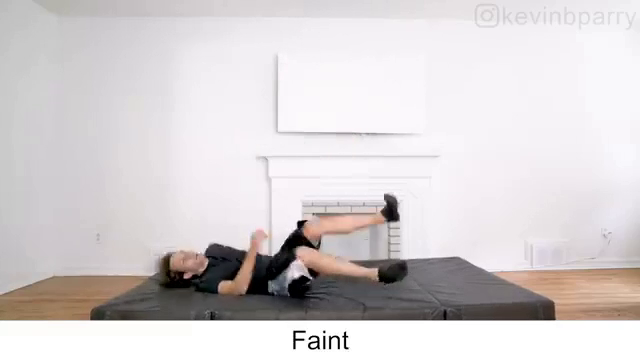

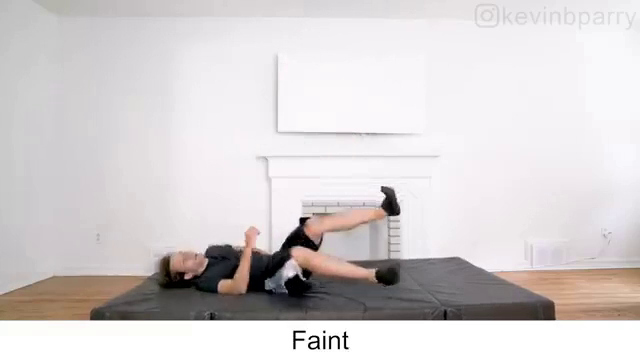

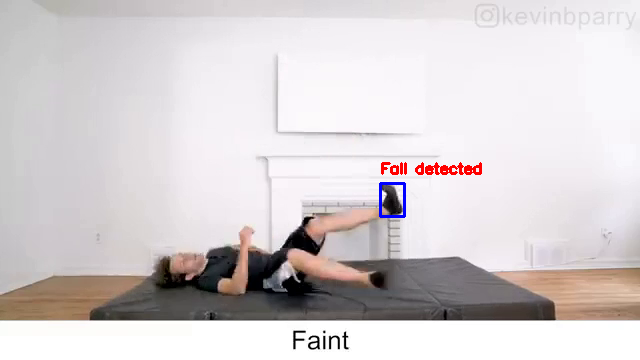

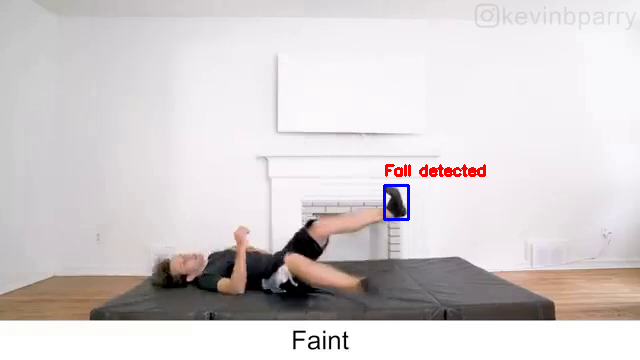

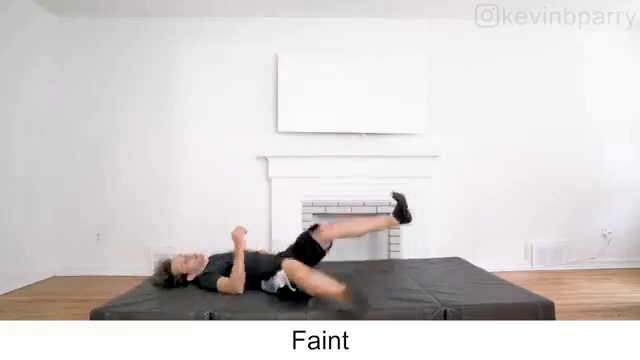

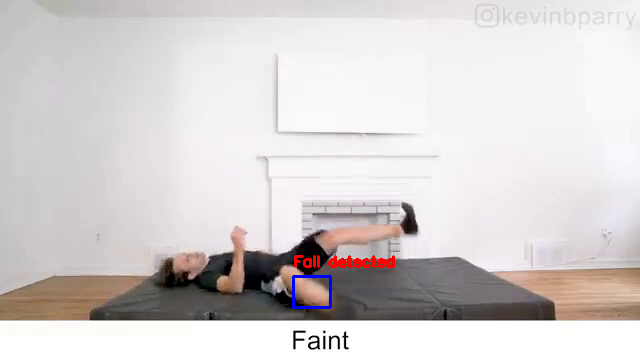

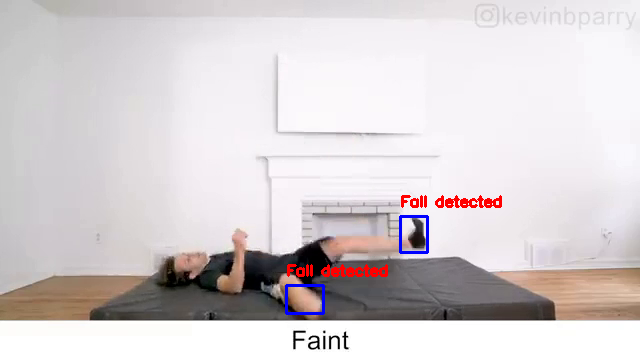

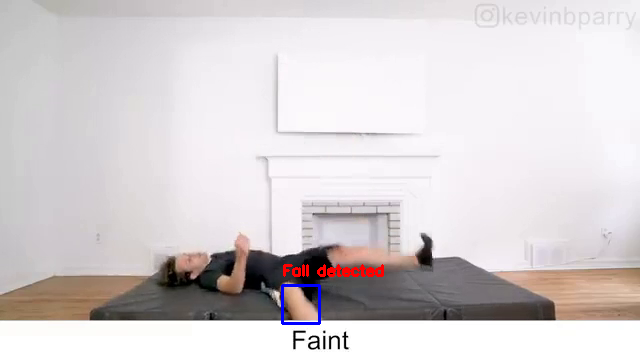

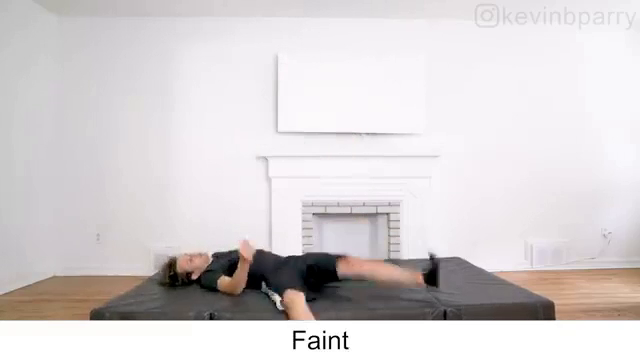

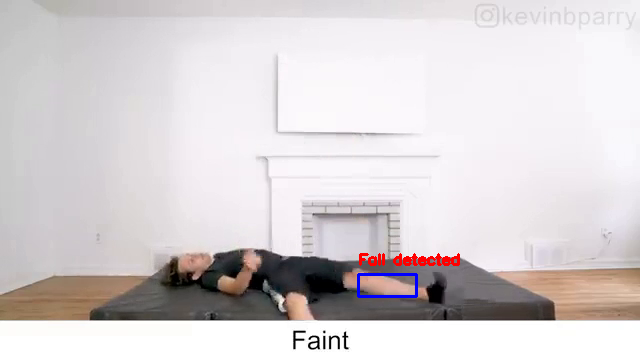

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('/content/drive/MyDrive/TUGAS 4 PCD-MUHAMMAD MAHDI-21 473808 PA 20431/people_fall.mp4')
font = cv2.FONT_HERSHEY_SIMPLEX
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    if ret and frame is not None:

        # pre-processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (7,7), 0)
        equ = cv2.equalizeHist(blur)

        # apply background subtraction
        fgmask = fgbg.apply(equ)

        # Apply threshold
        th = np.zeros(fgmask.shape, dtype=np.uint8)
        th[fgmask > 240] = 255

        # Apply erosion and dilation to remove noise and fill gaps and small holes
        kernel = np.ones((3, 3), dtype=np.uint8)
        opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)

        # find contours in the thresholded image
        contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for c in contours:

            # compute the bounding box for the contour
            (x, y, w, h) = cv2.boundingRect(c)

            if w / h < 0.7:
              continue

            # if the area of the bounding box is less than 500 or greater than 10000, ignore it
            area = cv2.contourArea(c)
            if area < 500 or area > 10000:
                continue

            # compute the solidity of the contour
            def compute_solidity(contour):
              hull = cv2.convexHull(contour, returnPoints=False)
              if hull.size == 0:
                  return 0
              area = cv2.contourArea(contour)
              hull_area = cv2.contourArea(cv2.convexHull(contour))
              solidity = float(area) / hull_area
              return solidity

            solidity = compute_solidity(c)

            if solidity < 0.3:
                continue

            # draw bounding box and label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, 'Fall detected', (x, y - 10), font, 0.5, (0, 0, 255), 2)

        # resize the output frame to a smaller size before displaying it
        frame = cv2.resize(frame, (640, 360))

        # display the resulting frame
        cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q') or not ret:
        break

cap.release()
cv2.destroyAllWindows()
